In [3]:
# read in data 
import pandas as pd
trout = pd.read_csv("trout.csv")

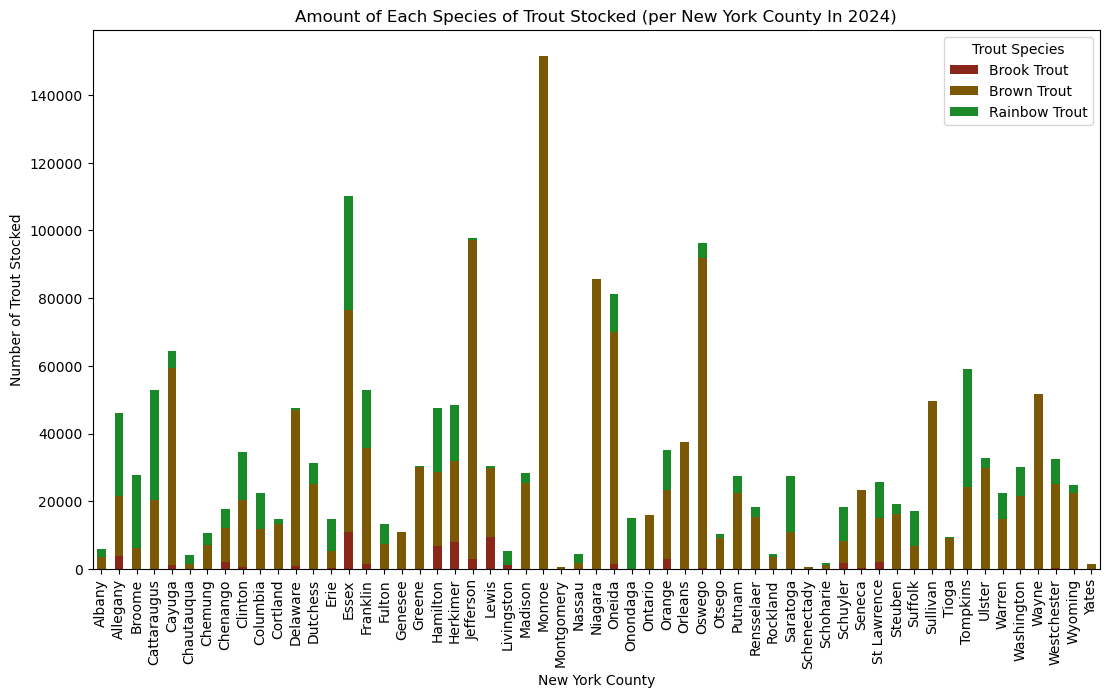

In [11]:
# https://www.statology.org/pandas-stacked-bar-chart/
import matplotlib.pyplot as plt
# We want ALL the stocked fish - so group by County and Species Name
# the .unstack() keeps the graph looking "pretty" and gives our original DataFrame back with its original index and column labels intact
group_trout = trout.groupby(["County", "Species Name"])["Number"].sum().unstack()

# create colors variable to store custom colors for the 3 trout bars in the graph
colors = "#8a271a","#7a5805","#1a8a29"

# plot the counts per county 
group_trout.plot(kind="bar", stacked=True, figsize=(13, 7), color=colors)

# add labels 
plt.title("Amount of Each Species of Trout Stocked (per New York County In 2024)")
plt.xlabel("New York County")
plt.ylabel("Number of Trout Stocked")
plt.legend(title="Trout Species")
# rotate x labels (so we can see better)
plt.xticks(rotation=90)

# output
plt.show()

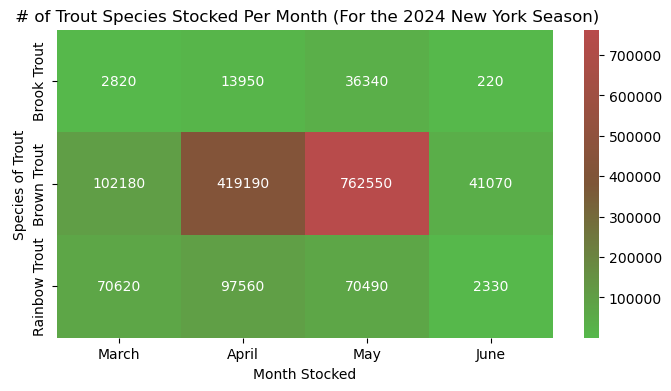

In [21]:
# lets see how the overall trout populations changed over the course of the stocking periods
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
import seaborn as sns
# need to use regular expressions to help fix months/dates bc theyre icky 
# https://www.geeksforgeeks.org/python-extract-substring-using-regex/
import re
# colors for later!
# https://www.geeksforgeeks.org/customizing-heatmap-colors-with-matplotlib/
import matplotlib.colors


# extract month from the 'Date' column using regex - we want ONLY month so do an "or" to find
def extract_month(date_str):
    match = re.search(r"(March|April|May|June)", str(date_str))
    return match.group(0) if match else None

# apply the function
trout['Month'] = trout['Date'].apply(extract_month)

# create a pivot table
pivot_table = trout.pivot_table(
    index='Species Name',
    columns='Month',
    values='Number',
# used to calculate the partial aggregates
    aggfunc='sum',
)

# the months arent in the right order, lets fix that bc its icky :)
month_order = ['March','April','May','June',]
pivot_table = pivot_table[[m for m in month_order if m in pivot_table.columns]]

# lets make custom colors to fit our theme!
colors = ('#56b84b','#7d5537','#b84b4b')
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("cmap", colors)

# plot!
plt.figure(figsize=(8, 4))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap=cmap)
plt.title(' # of Trout Species Stocked Per Month (For the 2024 New York Season)')
plt.ylabel('Species of Trout')
plt.xlabel('Month Stocked')
plt.show()